<a href="https://colab.research.google.com/github/periclesrialto/periclesrialto/blob/main/Titanic_Survival_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import math

In [ ]:
#import datasets (training and test)
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# **00. Tratamento dos dados e análises prévias**

In [ ]:
#shows features of the original data
df.info()

In [ ]:
#visualizes first 20 rows of data
df.head(50)
df.tail(50)

In [ ]:
#Checks for missing data
df.isnull().sum()

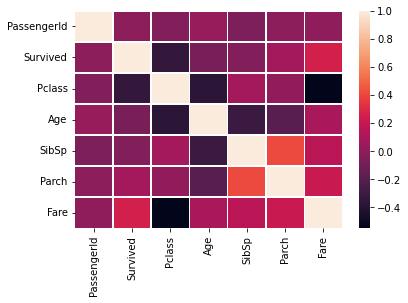

In [ ]:
#verifies correlations between features and plots a heatmap - original dataset training
sn.heatmap(df.corr(method ='pearson'), linewidth=0.5)

In [ ]:
#Creates new index for nobility
df["Nobility"] = ""
df_test["Nobility"] = ""
Nobility_titles= ['Mlle','Col','Capt','Countess','Jonkheer']
#checks if there are any title of nobility in the passenger name
df["Nobility"] = df["Name"].str.contains('|'.join(Nobility_titles))
df_test["Nobility"] = df_test["Name"].str.contains('|'.join(Nobility_titles))
#changes true values to 1 and false values to 0
df["Nobility"] = df["Nobility"].astype(int)
df_test["Nobility"] = df_test["Nobility"].astype(int)

In [ ]:
#Changes text to number
df["Sex"] = df["Sex"].map({'female': 1, 'male': 0})
df_test["Sex"] = df_test["Sex"].map({'female': 1, 'male': 0})
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nobility
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8d9b112d0>]],
      dtype=object)

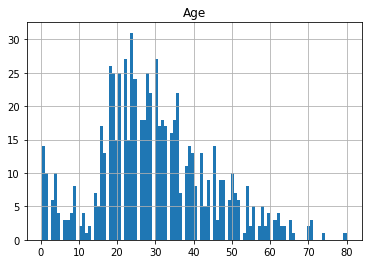

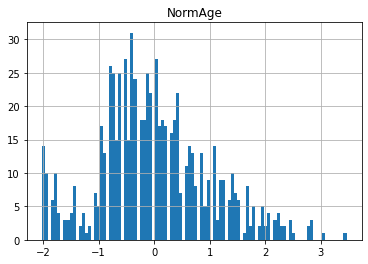

In [ ]:
#Age collumn analizes
df.hist(column="Age",bins=100)
df["NormAge"] = ""
df_test["NormAge"] = ""
df["NormAge"] = (df["Age"]-df["Age"].mean())/df["Age"].std()
df_test["NormAge"] = (df["Age"]-df["Age"].mean())/df["Age"].std()
df.hist(column="NormAge",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8da96e210>]],
      dtype=object)

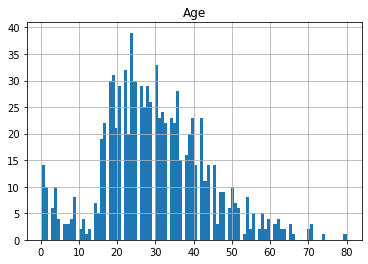

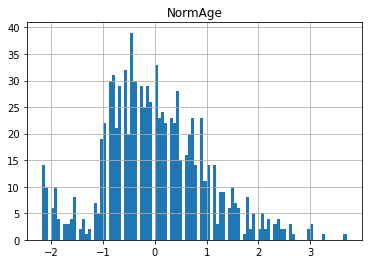

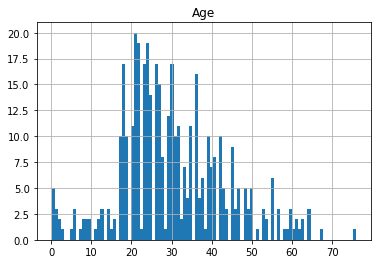

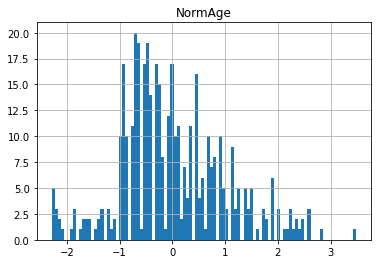

In [ ]:
#Finding a good way to replace missing age data
for row in range(df.index.size):
  if math.isnan(df.values[row,5]):
    df.iloc[row,5] = round((np.random.uniform( low=(-df["NormAge"].std()), high=(df["NormAge"].std())))*df["Age"].std() + df["Age"].mean())
df.hist(column="Age",bins=100)
df["NormAge"] = (df["Age"]-df["Age"].mean())/df["Age"].std()
df.hist(column="NormAge",bins=100)

for row in range(df_test.index.size):
  if math.isnan(df_test.values[row,4]):
    df_test.iloc[row,4] = round((np.random.uniform( low=(-df_test["NormAge"].std()), high=(df_test["NormAge"].std())))*df_test["Age"].std() + df_test["Age"].mean())
df_test.hist(column="Age",bins=100)
df_test["NormAge"] = (df_test["Age"]-df_test["Age"].mean())/df_test["Age"].std()
df_test.hist(column="NormAge",bins=100)

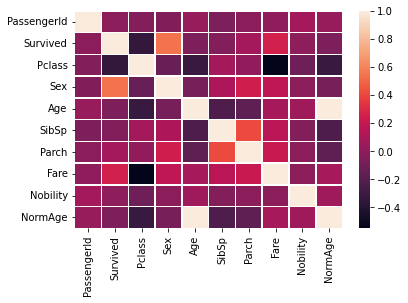

In [ ]:
sn.heatmap(df.corr(method ='pearson'), linewidth=0.5)

In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nobility,NormAge
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0,0.325805
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0,1.277092
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0,2.418638
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0,-0.244968
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0,-0.625483


In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Nobility         0
NormAge          0
dtype: int64

In [ ]:
df_test['Fare'] = df_test['Fare'].replace(np.nan, df_test['Fare'].mean())

# **01. Perceptron**

In [ ]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Text(0, 0.5, 'Number of updates')

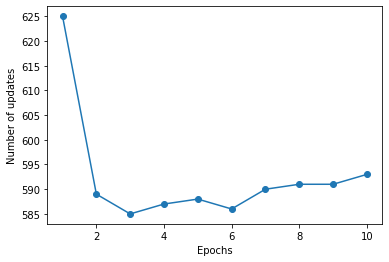

In [ ]:
# select survival
y = df.iloc[0:891, 1].values
# extract features
X = df.iloc[0:891, [4, 9]].values

ppn = Perceptron(eta=0.000001, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

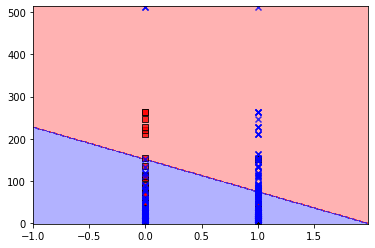

In [ ]:
plot_decision_regions(X, y, classifier=ppn)

# 02. **ADALINE**

In [ ]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

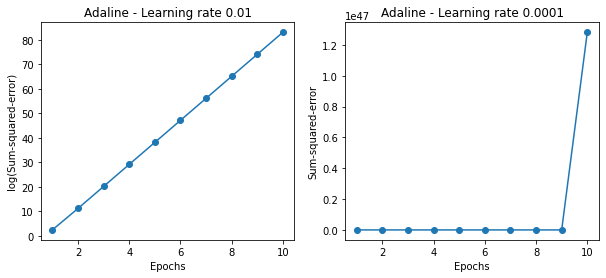

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

In [ ]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [ ]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

# **03. Scikit-learn logistic regression**

In [ ]:
df.info()

In [ ]:
df_test.info()

In [ ]:
from sklearn.model_selection import train_test_split

X_train = df.iloc[:, [2,4,5,6,7,9,12]].values
y_train = df.iloc[:, [1]].values

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.05, random_state=1, stratify=y)

X_test = df_test.iloc[:, [1,3,4,5,6,8,11]].values

#print('Class labels:', np.unique(y))

In [ ]:
#standardizing the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#X_combined_std = np.vstack((X_train_std, X_test_std))
#y_combined = np.vstack((y_train, y_test))

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(C=0.000000000001, random_state=1)
lr.fit(X_train_std, y_train)
y_predict = lr.predict(X_test)
accuracy_score(y_test,y_predict)

# **04. Scikit-learn SVM**

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='rbf', random_state=1, gamma=0.0001, C=80.0)
svm.fit(X_train_std, y_train)
y_predict = svm.predict(X_test)
accuracy_score(y_test,y_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7777777777777778

# **05. Scikit-learn Decision trees**

In [ ]:
X_test

array([[ 3.    ,  0.    , 34.5   , ...,  0.    ,  7.8292,  0.    ],
       [ 3.    ,  1.    , 47.    , ...,  0.    ,  7.    ,  0.    ],
       [ 2.    ,  0.    , 62.    , ...,  0.    ,  9.6875,  0.    ],
       ...,
       [ 3.    ,  0.    , 38.5   , ...,  0.    ,  7.25  ,  0.    ],
       [ 3.    ,  0.    , 27.    , ...,  0.    ,  8.05  ,  0.    ],
       [ 3.    ,  0.    , 35.    , ...,  1.    , 22.3583,  0.    ]])

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1, 
                              random_state=1)
tree.fit(X_train_std, y_train)
y_predict = tree.predict(X_test)

kaggle_result = pd.DataFrame(columns = ["PassengerId", "Survived"])
kaggle_result['PassengerId']  = df_test['PassengerId']
kaggle_result['Survived'] = y_predict
kaggle_result.to_csv('kaggle_result.csv',index=False)
#accuracy_score(y_test,y_predict)

# **06. Scikit-learn KNN**

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=15, 
                           p=2, 
                           weights='distance',
                           metric='minkowski')
knn.fit(X_train_std, y_train)
y_predict = knn.predict(X_test)
accuracy_score(y_test,y_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7333333333333333